<h2><B><left>Hello, This Notebook Contains example CoronaVirus Tweets Preprocessing.</left></B></h2>
<h4><I><left>- We use regular expresions to remove unwanted chars from tweetes.</left></I></h4>
<h4><I><left>- Extracting tokens from sentences then normalizing it(Lemmatization and Stemming).</left></I></h4>
<h4><I><left>- Creating Bag of Words using nltk library, and plot it using word-cloud library.</left></I></h4>
<h4><I><left>- Extracting Topics using LDA</left></I></h4>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
            <li><h3>Contents:</h3></li>
   <ul>
        <li><h4><a href="#clean">Data Cleaning.</a></h4></li>
        <li><h4><a href="#token"> Tokenization.</a></h4></li>
           <ul>
             <li><a href="#ext_tokens"> extract tokens</a></li>
             <li><a href="#norm_tokens"> normalize tokens</a></li>    
           </ul>
        <li><h4><a href="#bag"> Bag of Words.</a></h4></li>
       <ul>
             <li><a href="#unigrams"> unigrams bag of words</a></li>
             <li><a href="#bigrams"> bigrams bag of words</a></li>
             <li><a href="#hashtags"> hashtags bag of words</a></li>
        </ul>
        <li><h4><a href="#topics"> Topics.</a></h4></li>
       <li><h4><a href="#visual"> Some Visualize.</a></h4></li>    
    </ul>
    </ul>
</div>
<hr>

In [3]:
import nltk
import numpy as np
import pandas as pd
import random
import re 

In [4]:
data_frame = pd.read_csv('E:\Books and Resources\Educational\Covid_19_tweets_train.csv',encoding='latin1')

#show some part of data
data_frame.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
13179,16978,61930,United Kingdom,21-03-2020,Could supermarket delivery slots be kept for t...,Positive
13103,16902,61854,Ireland,21-03-2020,so disappointed in your treatment of your till...,Positive
6013,9812,54764,Canada,19-03-2020,"@FrTeacher2012 Hi there, sorry for the delayed...",Negative
39273,43072,88024,Western North Carolina,12-04-2020,Something is wrong here. My local grocery sto...,Negative
41092,44891,89843,"Fremont, CA",14-04-2020,"To the #nurses, #doctors, #truckdrivers, #ware...",Extremely Positive
31872,35671,80623,"Ulaanbaatar, Mongolia",07-04-2020,@Reflectblog @skboz @Z011322 After hording med...,Extremely Negative
28223,32022,76974,"Phoenix, Arizona",04-04-2020,@FAO report: Global prices 4 major #food commo...,Negative
9165,12964,57916,NaN,20-03-2020,Definition of a Cu t People who stock pile foo...,Extremely Negative
29837,33636,78588,"West Coast, Canada",06-04-2020,#Gold prices could rise again this week with d...,Negative
8807,12606,57558,"Egypt, PA",20-03-2020,As panic buyers empty supermarket shelves acro...,Extremely Negative


In [5]:
#drop some columns
data_frame = data_frame.drop(columns=['TweetAt','ScreenName','UserName'],axis=1)
data_frame.head(10)

,Location,OriginalTweet,Sentiment
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,UK,advice Talk to your neighbours family to excha...,Positive
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive
3,NaN,My food stock is not the only one which is emp...,Positive
4,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,"ÃT: 36.319708,-82.363649",As news of the regionÂs first confirmed COVID...,Positive
6,"35.926541,-78.753267",Cashier at grocery store was sharing his insig...,Positive
7,Austria,Was at the supermarket today. Didn't buy toile...,Neutral
8,"Atlanta, GA USA",Due to COVID-19 our retail store and classroom...,Positive
9,"BHAVNAGAR,GUJRAT","For corona prevention,we should stop to buy th...",Negative


<a id="clean"></a>
<h3><B><left>- Data Cleaning: </left></B></h3>

In [11]:
tweets = data_frame['OriginalTweet']
url_ptn = re.compile(r'http(s?)\S+')

ptn = re.compile(r'[^A-Za-z _#@]')
ptn2 = re.compile(r'(https\w+ ?)|(@\S+)|# ')
ptn3 = re.compile(r'([\w])\1+')

#first step: normalize to lowercase
tweets = [tweet.lower() for tweet in tweets]

#second step: delete urls:
tweets = [re.sub(url_ptn,'',tweet) for tweet in tweets]

#third step: delete punctuations:
tweets = [re.sub(ptn,' ',tweet) for tweet in tweets]

#4th step delete mentions:
tweets = [re.sub(ptn2,'',tweet) for tweet in tweets]

tweets

['    and  and ',
 'advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order',
 'coronavirus australia  woolworths to give elderly  disabled dedicated shopping hours amid covid    outbreak ',
 'my food stock is not the only one which is empty         please  don t panic  there will be enough food for everyone if you do not take more than you need     stay calm  stay safe       #covid  france #covid_   #covid   #coronavirus #confinement #confinementotal #confinementgeneral ',
 'me  ready to go at supermarket during the #covid   outbreak       not because i m paranoid  but because my food stock is litteraly empty  the #coronavirus is a serious thing  but please  don t panic  it causes shortage         #coronavirusfrance #restezchezvous #stayathome #confinement ',
 'as news of the region  s first confirmed covi

<a id="token"></a>
<h3><B><left>- Tokenization:</left></B></h3>
<h4><I><left>- extracting tokens from texts.</left></I></h4>

<h4><I><left>- normalizing tokens(limmatization and stemming).</left></I></h4>

-----------------

<a id="ext_tokens"></a>
<h4><I><left>- extracting tokens from texts:</left></I></h4>

In [7]:
#5th step: tokenization

# here: we take every tweet in tweets and check its words,
# adding word to new_tweets if word not a stop word
# we do tokenize step by using tweet.split()
# by this step the frequented spaces deleted by default.

new_tweets = []

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tweets_tokens = [[word for word in tweet.split() if not word in stop_words] for tweet in tweets]
for tweet in tweets_tokens:
    new_tweets.append(' '.join([word for word in tweet]))
    
tweets = new_tweets

#6th step: delete frequented letters:
tweets =[re.sub(ptn3,r'\1',tweet) for tweet in tweets]

# for tweet in tweets:
#   print(re.findall(r"img\w+",tweet))
data_frame['clean_tweets']= tweets
data_frame

,Location,OriginalTweet,Sentiment,clean_tweets
0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,gahan
1,UK,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia wolworths give elderly d...
3,NaN,My food stock is not the only one which is emp...,Positive,fod stock one empty please panic enough fod ev...
4,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket #covid outbreak paranoid ...
...,...,...,...,...
41152,"Wellington City, New Zealand",Airline pilots offering to stock supermarket s...,Neutral,airline pilots ofering stock supermarket shelv...
41153,NaN,Response to complaint not provided citing COVI...,Extremely Negative,response complaint provided citing covid relat...
41154,NaN,You know itÂs getting tough when @KameronWild...,Positive,know geting tough rationing toilet paper #coro...
41155,NaN,Is it wrong that the smell of hand sanitizer i...,Neutral,wrong smel hand sanitizer starting turn #coron...


In [8]:
data_frame.sample(10)

,Location,OriginalTweet,Sentiment,clean_tweets
17909,WestMonster,#FFS #Channel4News @Channel4\r\r\n\r\r\nWas th...,Neutral,#fs #chanel news eurospin sign spanish superma...
19728,UK,@ElectricTempus My employer in the motor trade...,Extremely Positive,employer motor trade actively encouraging gene...
22807,"St. Louis, Missouri",Live #coronavirus updates:\r\r\n\r\r\n- Unempl...,Extremely Negative,live #coronavirus updates unemployment aplicat...
33553,"Lancaster, PA",So many businesses have asked what can we do t...,Extremely Positive,many busineses asked help thankful comunity ca...
20091,Lusaka zambia,This is the time you wish zed was a producer a...,Positive,time wish zed producer consumer #zambia #coron...
39119,"In my house in Richmond, IN",Happy Easter!\r\r\n\r\r\nIf your Church is dis...,Extremely Positive,hapy easter church disregarding #socialdistanc...
2577,NaN,We're so busy wearing mask and using hand sani...,Extremely Positive,busy wearing mask using hand sanitizer outside...
22425,"Loudon, TN",@drchethansathya Because we're in Grocery outl...,Positive,grocery outlet biz ofice stil stafed wife taki...
35401,Ankara,#Oil prices on rise as market awaits #OPEC dec...,Positive,#oil prices rise market awaits #opec decision ...
25413,"Manchester, UK",Fridge situation critical. Might have to ventu...,Extremely Negative,fridge situation critical might venture son th...


<a id="norm_tokens"></a>
<h4><I><left>- normalizing tokens:</left></I></h4>

In [7]:
#7th step:
# data normalization
#1] stemming:
# porter = nltk.PorterStemmer()
# tweets = [" ".join([porter.stem(word) for word in tweet.split() ])for tweet in tweets]


In [9]:
#2] Lemmatization:
wnl = nltk.WordNetLemmatizer()
tweets = [" ".join([wnl.lemmatize(word) for word in tweet.split() ])for tweet in tweets]
tweets

['gahan',
 'advice talk neighbour family exchange phone number create contact list phone number neighbour schols employer chemist gp set online shoping acounts po adequate suplies regular med order',
 'coronavirus australia wolworths give elderly disabled dedicated shoping hour amid covid outbreak',
 'fod stock one empty please panic enough fod everyone take ned stay calm stay safe #covid france #covid #covid #coronavirus #confinement #confinementotal #confinementgeneral',
 'ready go supermarket #covid outbreak paranoid fod stock literaly empty #coronavirus serious thing please panic cause shortage #coronavirusfrance #restezchezvous #stayathome #confinement',
 'news region first confirmed covid case came sulivan county last wek people flocked area store purchase cleaning suplies hand sanitizer fod toilet paper god dodson report',
 'cashier grocery store sharing insight #covid prove credibility comented civics clas know talking',
 'supermarket today buy toilet paper #rebel #toiletpaperc

<a id="bag_words"></a>
<h3><B><left>- Bag of Words:</left></B></h3>
<a id="ext_tokens"></a>
<h4><I><left>- unigrams bag of words.</left></I></h4>

<h4><I><left>- bigrams bag of words.</left></I></h4>
<h4><I><left>- hashtags bag of words.</left></I></h4>

--------------

<a id="unigrams"></a>
<h4><I><left>- unigrams bag of words:</left></I></h4>

In [23]:
#8th step:
#get most common words,less common words:

all_words = []
for tweet in tweets:
    for word in tweet.split():
        all_words.append(word)
freq_dest_words = nltk.FreqDist(all_words)

print('most common:')
most_common=freq_dest_words.most_common(50)
print(most_common)
print('\nhapaxes:')
hapexes =freq_dest_words.hapaxes()[:50]
print(hapexes)


most common:
[('#coronavirus', 16030), ('#covid', 12529), ('covid', 10689), ('price', 8930), ('store', 8245), ('supermarket', 7333), ('fod', 6882), ('grocery', 6538), ('people', 5633), ('amp', 5197), ('consumer', 5077), ('shoping', 3381), ('online', 3375), ('time', 3200), ('u', 3093), ('get', 3036), ('worker', 2915), ('pandemic', 2821), ('ned', 2716), ('hand', 2677), ('panic', 2563), ('go', 2482), ('home', 2447), ('like', 2398), ('demand', 2331), ('help', 2197), ('coronavirus', 2175), ('sanitizer', 2169), ('stock', 2154), ('one', 2139), ('day', 1968), ('going', 1956), ('work', 1860), ('due', 1838), ('buying', 1780), ('mask', 1744), ('new', 1734), ('please', 1683), ('crisis', 1669), ('god', 1645), ('#toiletpaper', 1616), ('oil', 1542), ('toilet', 1525), ('paper', 1501), ('shop', 1500), ('make', 1499), ('shelf', 1484), ('today', 1474), ('stay', 1466), ('delivery', 1459)]

hapaxes:
['#houstonboutique', 'intimated', 'movevan', 'kahahah', '#coronaclout', 'retai', '#powertalk', 'sax', 'chmur

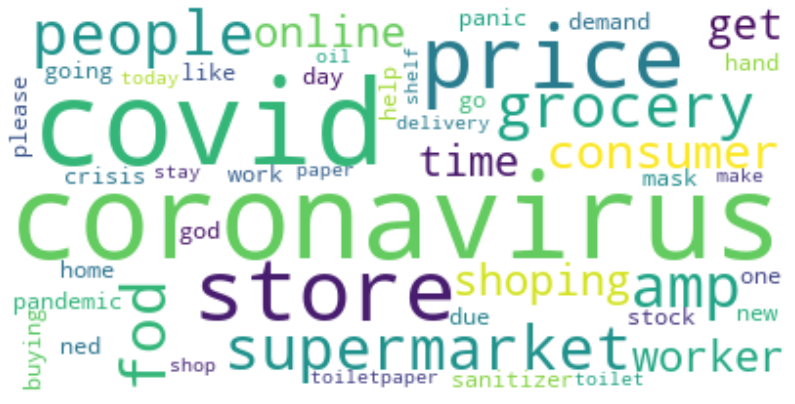

In [35]:
#show words collacations:

from wordcloud import WordCloud
most_common_words = " ".join(word[0] for word in most_common)

most_common_words_cloud= WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=most_common_words
)
# generate the word cloud
most_common_words_cloud.generate(most_common_words)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
# display the cloud
plt.imshow(most_common_words_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
#9th step:
#remove hapexes from tweets:

new_tweets = []
for tweet in tweets:
    new_tweets.append(' '.join(word for word in tweet.split() if not word in hapexes))
tweets = new_tweets    

<a id="bigrams"></a>
<h4><I><left>- bigrams bag of words:</left></I></h4>

In [12]:
#10th step:
#create bigrams

#here we get all tweets in one string
tweets_as_string = ' '.join(tweets)

from nltk.util import bigrams
from nltk.lm.preprocessing import pad_both_ends

bigrams_list = list(bigrams(pad_both_ends(tweets_as_string.split(), n=2)))


# most common bigrams
# bigrams collacations
bigrams_freq_dest= nltk.FreqDist(bigrams_list)
bigrams_freq_dest.most_common(15)

[(('grocery', 'store'), 5099),
 (('#coronavirus', '#covid'), 2277),
 (('#covid', '#coronavirus'), 1922),
 (('hand', 'sanitizer'), 1523),
 (('online', 'shoping'), 1326),
 (('toilet', 'paper'), 1253),
 (('panic', 'buying'), 1152),
 (('#covid', '#covid'), 1066),
 (('oil', 'price'), 946),
 (('covid', 'pandemic'), 905),
 (('social', 'distancing'), 644),
 (('due', 'covid'), 575),
 (('store', 'worker'), 531),
 (('fod', 'bank'), 527),
 (('stay', 'home'), 526)]

<a id="hashtags"></a>
<h4><I><left>- hashtags bag of words:</left></I></h4>

In [38]:
#11th step:
#get all hashtags in tweets:

hashtag_ptn = r'#\S+'
hashtags =[]

for tweet in tweets:
    tweet_hastags = re.findall(hashtag_ptn,tweet) 
    for h in tweet_hastags:
        if len(h)!= 0:
            hashtags.append(h)
hashtags

['#covid',
 '#covid',
 '#covid',
 '#coronavirus',
 '#confinement',
 '#confinementotal',
 '#covid',
 '#coronavirus',
 '#restezchezvous',
 '#stayathome',
 '#confinement',
 '#covid',
 '#toiletpapercrisis',
 '#covid',
 '#indiafightscorona',
 '#lockdown',
 '#covid',
 '#philipines',
 '#coronavirus',
 '#coronavirus',
 '#covid',
 '#covid',
 '#trials',
 '#monthly',
 '#yearly',
 '#prices',
 '#subscriptions',
 '#bestiptv',
 '#iptv',
 '#service',
 '#iptv',
 '#iptvdeals',
 '#cheap',
 '#iptv',
 '#fotbal',
 '#hd',
 '#movies',
 '#adult',
 '#cinema',
 '#hotmovies',
 '#iptv',
 '#adult',
 '#covid',
 '#trials',
 '#monthly',
 '#yearly',
 '#prices',
 '#subscriptions',
 '#bestiptv',
 '#iptv',
 '#service',
 '#iptv',
 '#iptvdeals',
 '#cheap',
 '#iptv',
 '#fotbal',
 '#hd',
 '#movies',
 '#adult',
 '#cinema',
 '#hotmovies',
 '#iptv',
 '#consumer',
 '#covid',
 '#covid',
 '#coronavirus',
 '#stockup',
 '#breakingnews',
 '#breaking',
 '#coronavirus',
 '#coronavirusoutbreak',
 '#covid',
 '#covid',
 '#covid',
 '#covid'

In [28]:
#12th step:
#show most common and less common hashtags:
freq_dest_hashtags = nltk.FreqDist(hashtags)

print('most common:')
most_common_h=freq_dest_hashtags.most_common(50)
print(most_common_h)
print('\nhapaxes:')
hapexes_h =freq_dest_hashtags.hapaxes()[:50]
print(hapexes_h)

most common:
[('#coronavirus', 16030), ('#covid', 12531), ('#toiletpaper', 1616), ('#socialdistancing', 944), ('#coronacrisis', 767), ('#pandemic', 488), ('#stayhome', 466), ('#coronavirusoutbreak', 441), ('#coronaviruspandemic', 440), ('#corona', 429), ('#lockdown', 417), ('#stayathome', 386), ('#retail', 385), ('#supermarket', 374), ('#quarantine', 367), ('#stayhomesavelives', 361), ('#panicbuying', 345), ('#stophoarding', 323), ('#fod', 299), ('#coronavirusupdate', 296), ('#staysafe', 253), ('#stopanicbuying', 251), ('#shoping', 246), ('#sanitizer', 245), ('#quarantinelife', 232), ('#oil', 226), ('#handsanitizer', 219), ('#consumer', 211), ('#grocery', 183), ('#coronavirusuk', 173), ('#ecomerce', 172), ('#toiletpapercrisis', 165), ('#toiletpaperpanic', 160), ('#economy', 149), ('#virus', 149), ('#china', 145), ('#panicbuyinguk', 132), ('#coronavirususa', 132), ('#trump', 124), ('#coronaviruslockdown', 124), ('#health', 123), ('#uk', 117), ('#amazon', 115), ('#busines', 115), ('#supe

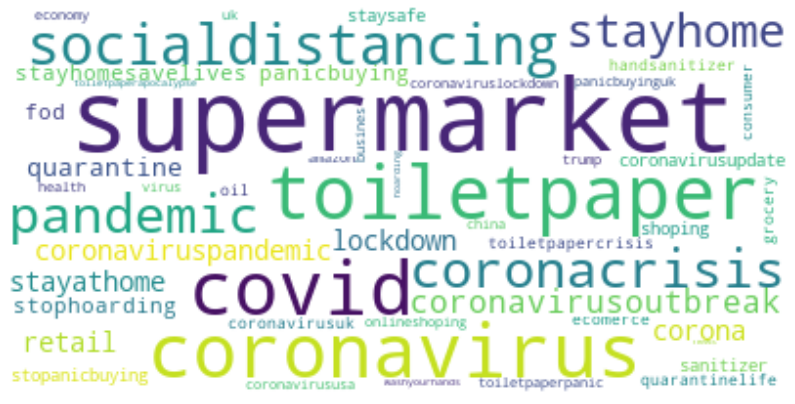

In [36]:
# show most frequented hashtags:
most_common_hashtags = " ".join(word[0] for word in most_common_h)

most_common_hashtags_cloud= WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=most_common_words
)
# generate the word cloud
most_common_words_cloud.generate(most_common_hashtags)

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
# display the cloud
plt.imshow(most_common_words_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<a id="topics"></a>
<h3><B><left>- Topics using LDA.</left></B></h3>

--------------

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation as LDA
sns.set_style('whitegrid')
%matplotlib inline

FreqDist({'#coronavirus': 16030, '#covid': 12529, 'covid': 10689, 'price': 8930, 'store': 8245, 'supermarket': 7333, 'fod': 6882, 'grocery': 6538, 'people': 5633, 'amp': 5197, ...})

In [56]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        

In [63]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(tweets)

In [64]:
topics_num= 5
words_in_topic = 10

lda = LDA(n_components=topics_num, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(n_components=5, n_jobs=-1)

In [66]:
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

In [68]:
#saving topics:
pyLDAvis.save_html(LDAvis_prepared, './tweets_'+ str(topics_num) +'.html')

In [61]:
print_topics(lda, count_vectorizer, 10)


Topic #0:
coronavirus covid fod hand sanitizer panic people buying ned stock

Topic #1:
store covid supermarket coronavirus grocery people worker like going day

Topic #2:
covid online shoping coronavirus fod amp store demand pandemic retail

Topic #3:
price coronavirus covid oil market pandemic demand amp low gas

Topic #4:
consumer covid coronavirus new impact scam behavior pandemic crisis report


<a id="visual"></a>
<h3><B><left>- Some Visualize.</left></B></h3>

--------------

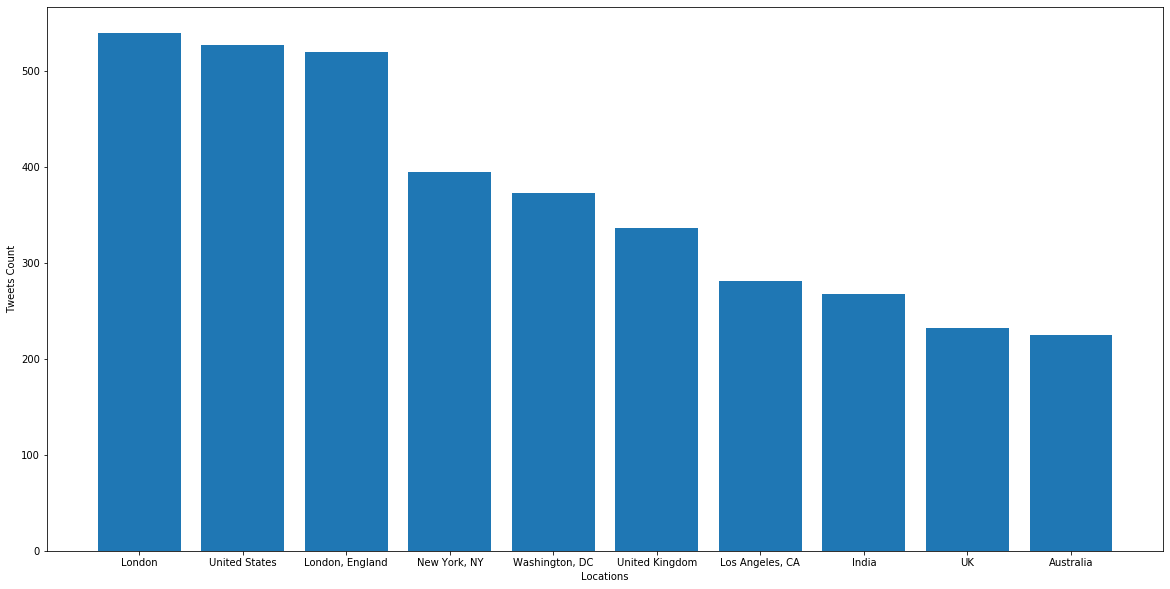

In [40]:
#13th step:
#show most frequented tweets count in its locations:
import matplotlib.pyplot as plt

#dropna used to drop rows that has NaN value:
locations = data_frame['Location'].dropna()

freq_dest_locations = nltk.FreqDist(locations)

most_common_locations=freq_dest_locations.most_common(10)
location_name= [w[0] for w in most_common_locations]
location_counts= [w[1] for w in most_common_locations]

plt.figure(figsize=(20,10))
plt.bar(location_name,location_counts)
plt.xlabel("Locations")
plt.ylabel("Tweets Count")
plt.show()
